In [24]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [28]:
parent_path = os.path.dirname(os.getcwd())

# Read in csv into a dataframe
df = pd.read_csv(os.path.join(parent_path, 'data/churn_data.csv'))

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
# Data Exploration - No nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [34]:
# Drop columns that will not be used to train the model
df.drop(columns = ['RowNumber','CustomerId', 'Surname'], inplace=True)

In [36]:
# EDA 
cat_vars = df.select_dtypes(['object']).columns
num_vars = df.select_dtypes(['number']).columns

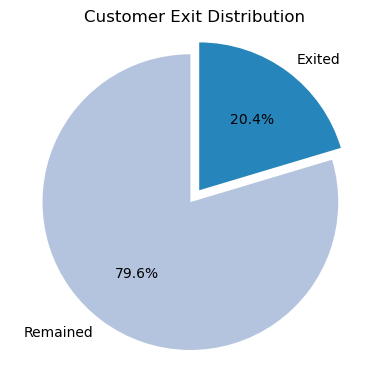

In [38]:
# PieChart - Exited

palette = sns.color_palette('PuBu', 2)

exited_count = df['Exited'].value_counts().sort_index()

labels =  ['Remained','Exited']  

plt.pie(exited_count, labels = labels, colors=palette, autopct='%1.1f%%', explode = [0.05, 0.05], startangle=90)
plt.title('Customer Exit Distribution', y=0.95, fontsize=12);

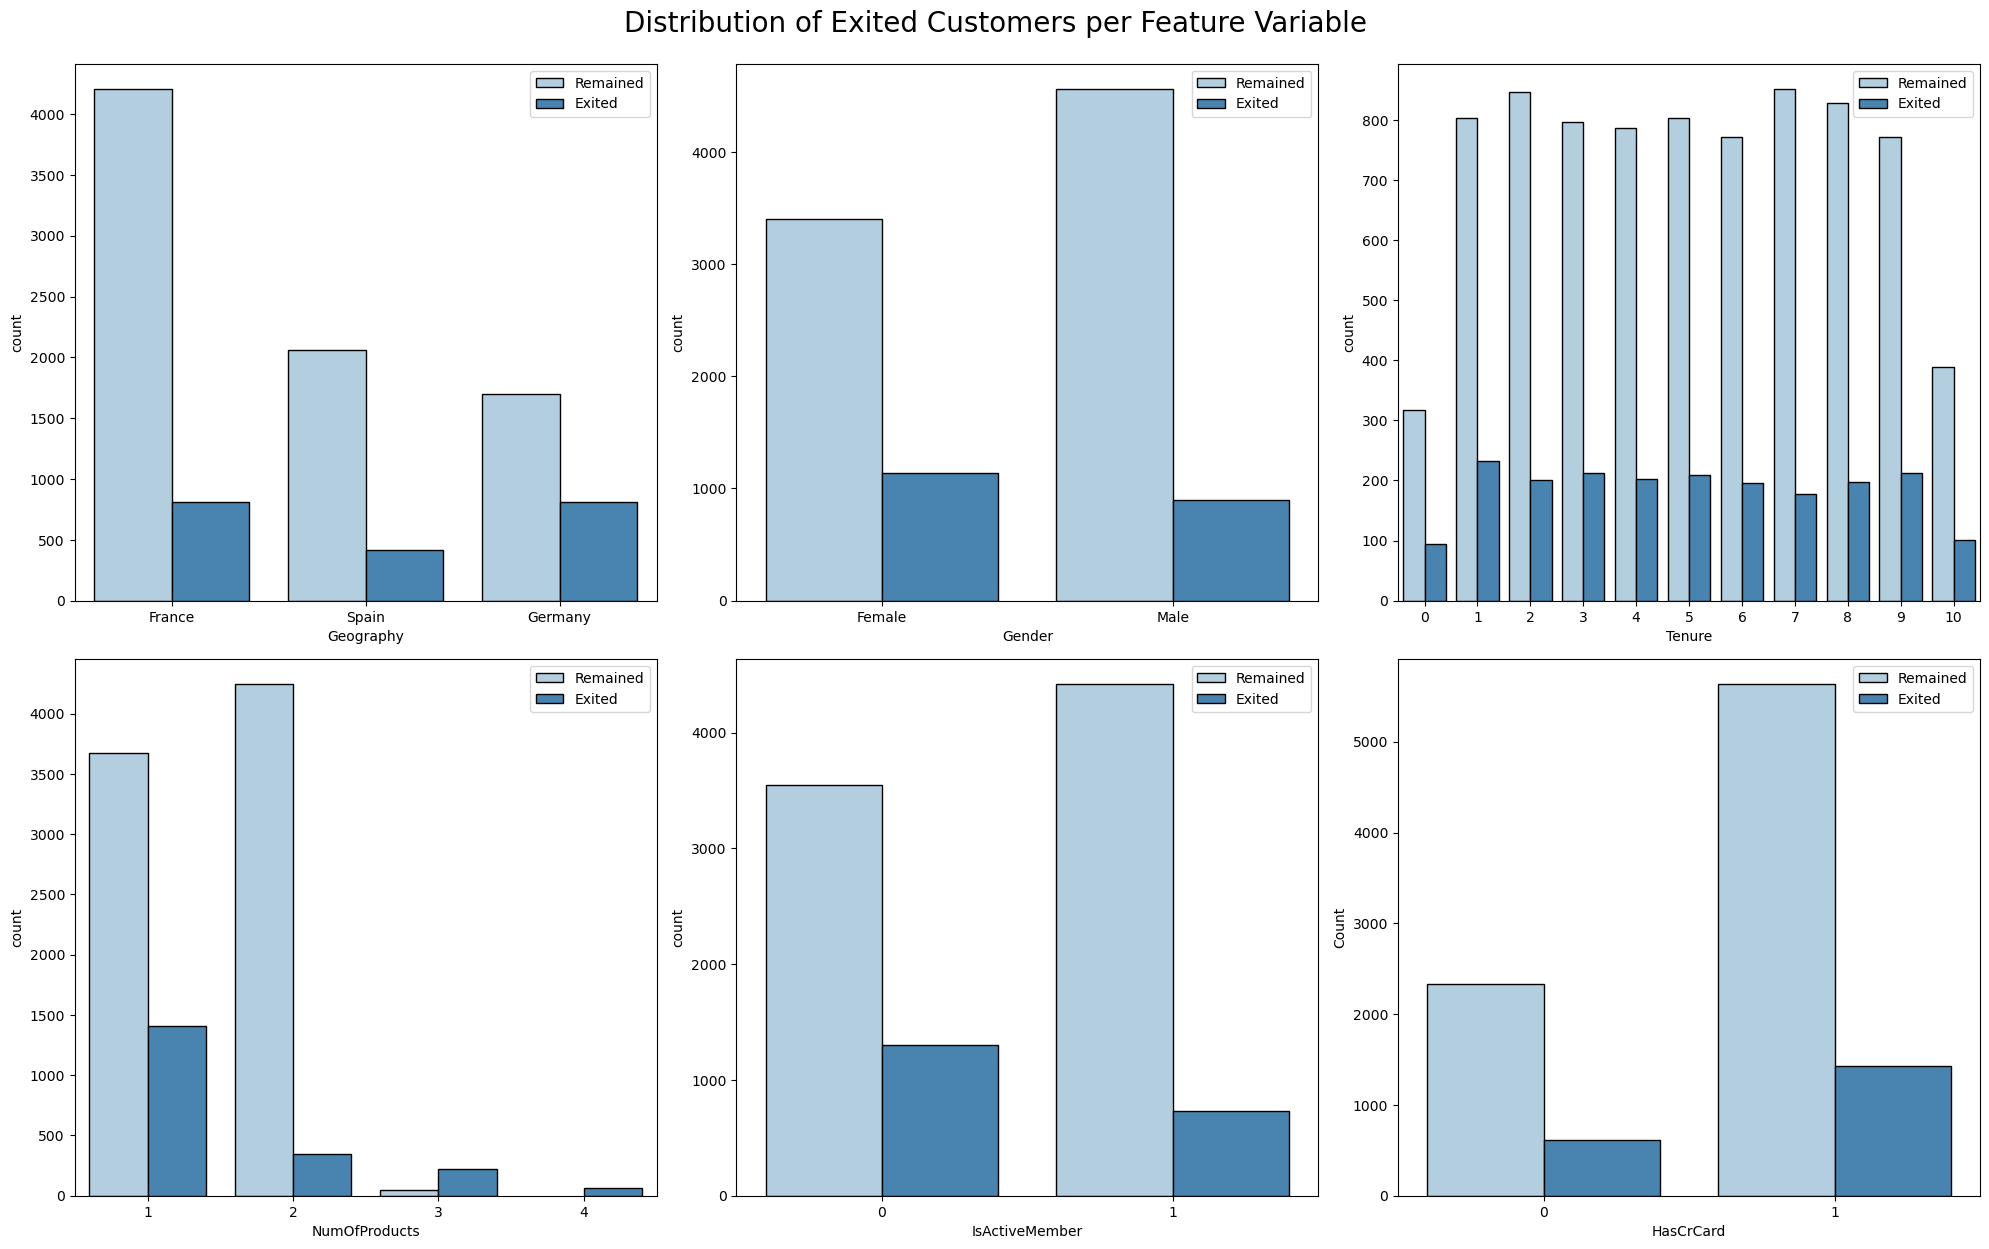

In [40]:
# Countplot for cat vars - Geography, Gender, Exited, Tenure, NumOfProducts, IsActiveMember, HasCrCard
def get_custom_axes(figsize: list, rows: int, columns: int, subplots: list):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(rows,columns)
    axes = [fig.add_subplot(gs[i]) for i in range(len(subplots))]
    return axes

# Convert Tenure / NumOfProducts to Categories
category_cols = ['Tenure', 'NumOfProducts']
df[category_cols] = df[category_cols].astype('category')

# List of columns to be visualised in a countplot
all_vars = df.select_dtypes(['category', 'object']).columns.to_list() +['IsActiveMember', 'HasCrCard']


# Call the 'get_custom_axes' function to create a custom axes to accommodate 6 subplots
axes = get_custom_axes(figsize=(20,18), rows=3, columns=3, subplots=all_vars)

for i, var in enumerate(all_vars):
    sns.countplot(x=var, data=df, ax=axes[i], hue='Exited', palette = 'Blues', edgecolor= 'black')
    plt.ylabel('Count')
    plt.suptitle('Distribution of Exited Customers per Feature Variable', fontsize=20, y = 0.99, va='center')
    axes[i].legend(['Remained', 'Exited'], loc='upper right')

   
plt.tight_layout()


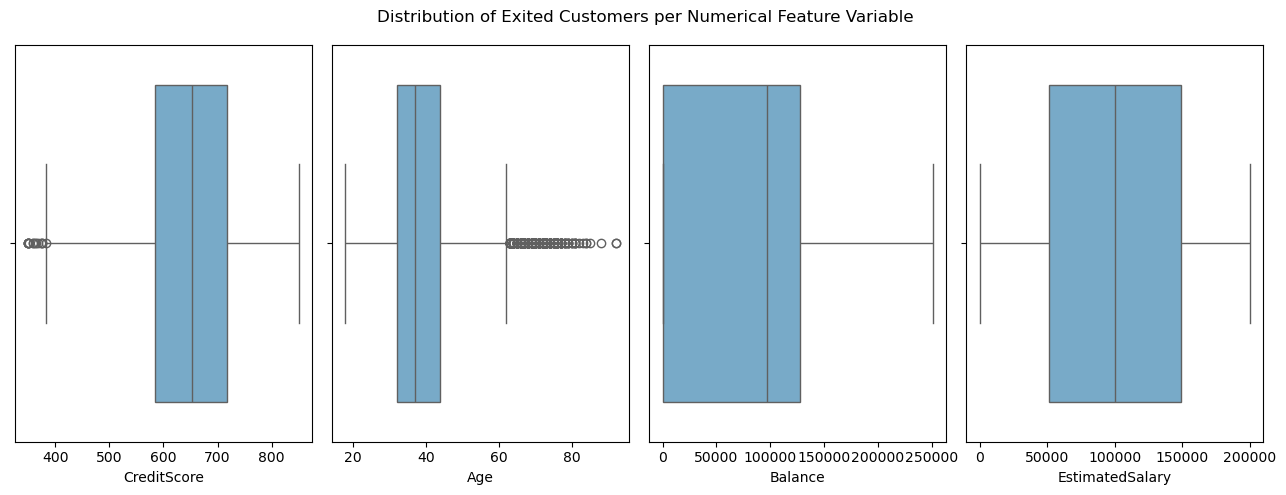

In [42]:
# Visualise the distribution of numerical features via a boxplot

num_vars = ['CreditScore', 'Age', 'Balance' , 'EstimatedSalary']

fig, axes = plt.subplots(1,4, figsize=(13,5))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(data=df, x=var, palette='Blues',ax = axes[i])
    plt.suptitle('Distribution of Exited Customers per Numerical Feature Variable')

plt.tight_layout()

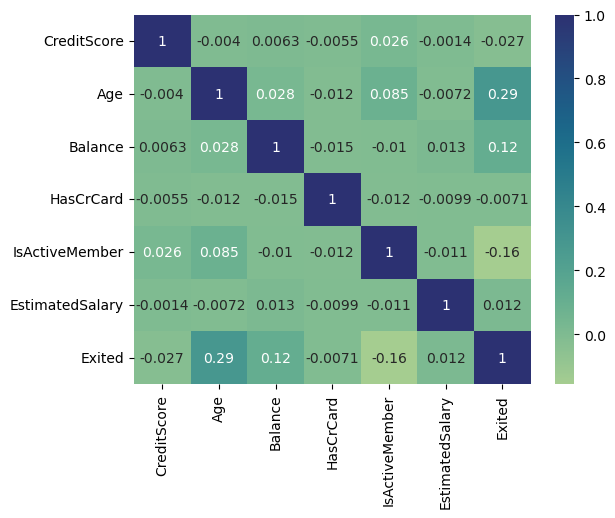

In [44]:
# Analyse whether there is any correlation between the numerical variables
corr_df = df.select_dtypes(include=['number']).corr()

corr_df

# Plot the correlation coefficients in a heatmap - Minimal/no correlation evident between the variables

sns.heatmap(corr_df, cmap='crest', annot=True);

Minimal to no correlation evident between the variables

In [47]:
# Save df to be used in model building

df.to_csv('clean_df.csv')